In [2]:
import pandas as pd 
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Brakuje niektórych wartości parametru BMI, zostanie uzupełnione na podstawie k-najbliższych elementow
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
#Wykorzystam dummy encoding dla male/female/other
print(df["gender"].unique())
print(df["ever_married"].unique())
print(df["work_type"].unique())
print(df["Residence_type"].unique())
print(df["smoking_status"].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [5]:
#Liczba kobiet/męzczyzn/innych
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [6]:
#getting dummies for gender,ever_married,work_type,residence_type,smoking_status
df1 = pd.get_dummies(df["gender"], drop_first = True)
df2 = pd.get_dummies(df["ever_married"], drop_first = True)
df3 = pd.get_dummies(df["work_type"], drop_first = True)
df4 = pd.get_dummies(df["Residence_type"], drop_first = True)
df5 = pd.get_dummies(df["smoking_status"], drop_first = True)

In [7]:
df=df.drop(["gender","ever_married","work_type","Residence_type","smoking_status"],axis=1)


In [8]:
df = pd.concat([df, df1,df2,df3,df4,df5], axis = 1)

In [9]:
Y=df["stroke"]
X=df.drop(["stroke","id"],axis=1)

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
X= pd.DataFrame(imputer.fit_transform(X), columns = X.columns)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [12]:
X_train.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'Male', 'Other', 'Yes', 'Never_worked', 'Private', 'Self-employed',
       'children', 'Urban', 'formerly smoked', 'never smoked', 'smokes'],
      dtype='object')

In [53]:
y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
929     0
2629    0
663     0
2303    0
3122    0
Name: stroke, Length: 1533, dtype: int64

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score

In [14]:
model = keras.Sequential(
    [
        layers.Dense(20,input_dim=16, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=250, batch_size=10)

Epoch 1/250
358/358 [==============================] - 1s 1ms/step - loss: 0.4851 - accuracy: 0.9044
Epoch 2/250
358/358 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9516
Epoch 3/250
358/358 [==============================] - 0s 969us/step - loss: 0.1926 - accuracy: 0.9516
Epoch 4/250
358/358 [==============================] - 0s 987us/step - loss: 0.1899 - accuracy: 0.9505
Epoch 5/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9505
Epoch 6/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1883 - accuracy: 0.9500
Epoch 7/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1866 - accuracy: 0.9502
Epoch 8/250
358/358 [==============================] - 0s 984us/step - loss: 0.1876 - accuracy: 0.9502
Epoch 9/250
358/358 [==============================] - 0s 999us/step - loss: 0.1832 - accuracy: 0.9497
Epoch 10/250
358/358 [==============================] - 0s 940us/step - loss: 0.180

Epoch 81/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9514
Epoch 82/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1527 - accuracy: 0.9516
Epoch 83/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9514
Epoch 84/250
358/358 [==============================] - 1s 2ms/step - loss: 0.1540 - accuracy: 0.9516
Epoch 85/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9514
Epoch 86/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9516
Epoch 87/250
358/358 [==============================] - 0s 983us/step - loss: 0.1542 - accuracy: 0.9516
Epoch 88/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9516
Epoch 89/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.9516
Epoch 90/250
358/358 [==============================] - 1s 1ms/step - loss: 0.15

358/358 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9522
Epoch 161/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9525
Epoch 162/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.9519
Epoch 163/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9530
Epoch 164/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9508
Epoch 165/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0.9508
Epoch 166/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9511
Epoch 167/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.9528
Epoch 168/250
358/358 [==============================] - 1s 2ms/step - loss: 0.1445 - accuracy: 0.9522
Epoch 169/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1459 - a

358/358 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.9528
Epoch 239/250
358/358 [==============================] - 0s 920us/step - loss: 0.1375 - accuracy: 0.9519
Epoch 240/250
358/358 [==============================] - 0s 889us/step - loss: 0.1380 - accuracy: 0.9536
Epoch 241/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9536
Epoch 242/250
358/358 [==============================] - 0s 973us/step - loss: 0.1402 - accuracy: 0.9533
Epoch 243/250
358/358 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.9514
Epoch 244/250
358/358 [==============================] - 0s 946us/step - loss: 0.1383 - accuracy: 0.9508
Epoch 245/250
358/358 [==============================] - 0s 919us/step - loss: 0.1385 - accuracy: 0.9528
Epoch 246/250
358/358 [==============================] - 0s 954us/step - loss: 0.1378 - accuracy: 0.9525
Epoch 247/250
358/358 [==============================] - 0s 975us/step - lo

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [69]:
y_predict = model.predict(X_test)


In [62]:
y_predict=(y_predict>0.2)

In [63]:
y_predict

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [64]:
y_predict=y_predict.astype(int)

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))


0.9328114807566862


[[1423   34]
 [  69    7]]


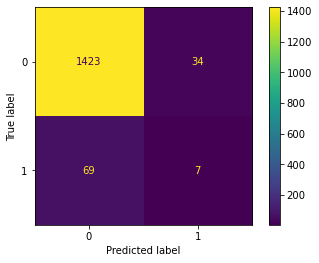

In [66]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_predict)
print(cm)
from sklearn.metrics import ConfusionMatrixDisplay


cm_display = ConfusionMatrixDisplay(cm).plot()

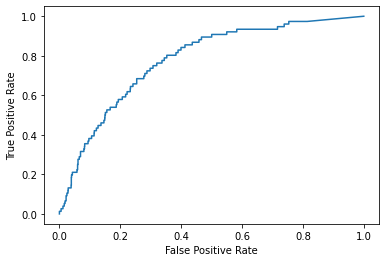

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_predict)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()